I should probably also have a node color legend

In [1]:
from Connectome import *

In [2]:
connectome = Connectome('data/repeated_10_scale_500/160830_repeated10_scale500.graphml', label='')

In [3]:
connectome.read_net(use_3d=False)

In [4]:
graph = connectome.graph

graph.nodes

NodeView(('37', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53', '55', '56', '57', '58', '60', '63', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '216', '217', '218', '219', '220', '221', '222', '2

In [5]:
from scipy.sparse.csgraph import laplacian

# Adjacency matrix of the graph
A = nx.adjacency_matrix(graph)
L = laplacian(A, normed=True)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [6]:
print(L)

<COOrdinate sparse array of dtype 'float64'
	with 25456 stored elements and shape (726, 726)>
  Coords	Values
  (0, 1)	-0.7071067811865475
  (0, 10)	-0.11180339887498947
  (1, 0)	-0.7071067811865475
  (2, 3)	-0.021968738758187337
  (2, 4)	-0.1091089451179962
  (2, 7)	-0.03706246583305506
  (2, 8)	-0.02126216277812811
  (2, 10)	-0.029880715233359837
  (2, 14)	-0.07142857142857142
  (2, 53)	-0.01754656015858991
  (2, 59)	-0.020619652471058063
  (2, 60)	-0.03706246583305506
  (2, 61)	-0.07715167498104596
  (2, 71)	-0.026726124191242435
  (2, 72)	-0.017699808135119715
  (2, 73)	-0.02571722499368198
  (2, 74)	-0.02817180849095055
  (2, 78)	-0.0174714139453653
  (2, 86)	-0.01949202938963626
  (2, 116)	-0.02326210525996177
  (2, 128)	-0.02291746242570528
  (2, 129)	-0.024000768036865964
  (2, 140)	-0.02086959677824205
  (2, 156)	-0.02126216277812811
  (2, 171)	-0.02291746242570528
  :	:
  (701, 701)	1.0
  (702, 702)	1.0
  (703, 703)	1.0
  (704, 704)	1.0
  (705, 705)	1.0
  (706, 706)	1.0
  (70

In [7]:
print(L.shape)

(726, 726)


In [8]:
import numpy as np
from scipy.sparse.linalg import eigsh

eigenvalues, eigenvectors = eigsh(L, k=10, which='SM')
eigenvalues

array([-1.14139384e-16,  1.97387356e-02,  1.04000989e-01,  1.19604858e-01,
        2.68122160e-01,  2.82793178e-01,  2.88352397e-01,  2.93003073e-01,
        3.20294423e-01,  3.36470699e-01])

In [9]:
def get_idx(eigenvalues):
    diff = 1e-4

    for i in range(len(eigenvalues) - 1):
        curr = eigenvalues[i]
        ne = eigenvalues[i+1]

        if np.abs(curr - ne) > diff and ne > 1e-6:
            return i+1, i+2

    return None

In [10]:
yi, yj = get_idx(eigenvalues)

In [11]:
yi, yj

(1, 2)

In [12]:
eigenvectors

array([[ 0.00899297,  0.01003523,  0.00334898, ..., -0.03611061,
        -0.03602088, -0.0358309 ],
       [ 0.00635899,  0.00723886,  0.00264296, ..., -0.03611622,
        -0.037473  , -0.03818411],
       [ 0.0336486 ,  0.03558545,  0.00861886, ...,  0.00507766,
         0.02180019,  0.03345296],
       ...,
       [ 0.05166066, -0.05279935,  0.0114373 , ..., -0.02470882,
        -0.00464977,  0.00211524],
       [ 0.06638977, -0.05737844, -0.0807857 , ..., -0.06746356,
        -0.0066123 ,  0.00284389],
       [ 0.01557627,  0.00503904, -0.00345207, ..., -0.00560771,
         0.00616624, -0.00415311]])

In [13]:
eigenvalues.shape

(10,)

In [14]:
eigenvectors.shape

(726, 10)

/var/folders/vb/0k5r3_317791vc8ty3xcxyq00000gn/T/ipykernel_54822/1780975271.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(eigenvectors[:, yi], eigenvectors[:, yj], cmap='viridis')


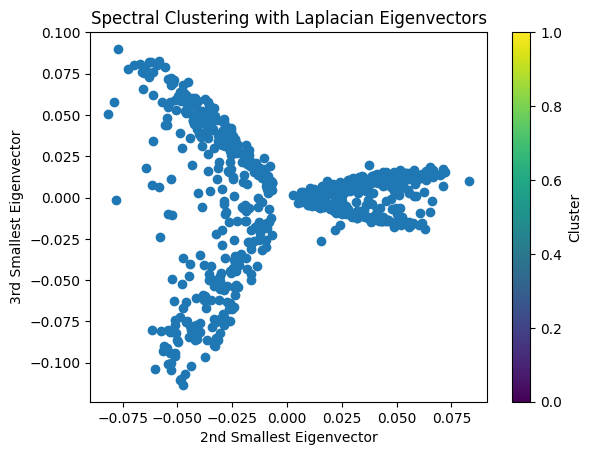

In [15]:
plt.scatter(eigenvectors[:, yi], eigenvectors[:, yj], cmap='viridis')
plt.xlabel("2nd Smallest Eigenvector")
plt.ylabel("3rd Smallest Eigenvector")
plt.title("Spectral Clustering with Laplacian Eigenvectors")
plt.colorbar(label="Cluster")
plt.show()

/var/folders/vb/0k5r3_317791vc8ty3xcxyq00000gn/T/ipykernel_54822/189119778.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(eigenvectors[:, yj], eigenvectors[:, yj+1], cmap='viridis')


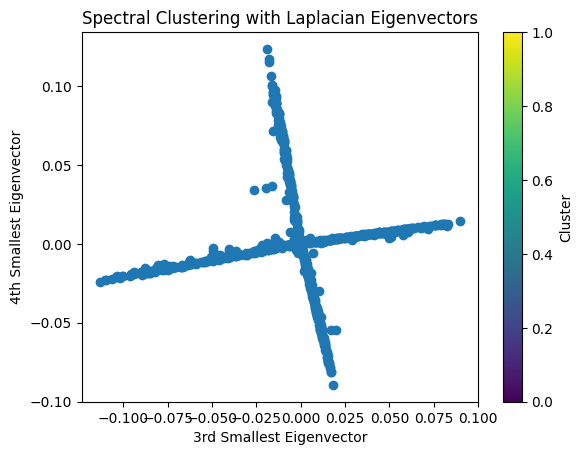

In [16]:
plt.scatter(eigenvectors[:, yj], eigenvectors[:, yj+1], cmap='viridis')
plt.xlabel("3rd Smallest Eigenvector")
plt.ylabel("4th Smallest Eigenvector")
plt.title("Spectral Clustering with Laplacian Eigenvectors")
plt.colorbar(label="Cluster")
plt.show()

In [17]:
fiedler_vector = eigenvectors[:, np.argsort(eigenvalues)[yi]]  # Second smallest eigenvector
node_importance = {node: fiedler_vector[i] for i, node in enumerate(graph.nodes)}

node_importance

{'37': np.float64(0.0100352273850901),
 '43': np.float64(0.007238863344474695),
 '45': np.float64(0.03558544733964997),
 '46': np.float64(0.05745641515561539),
 '47': np.float64(0.011850365167456498),
 '48': np.float64(0.024621004769120148),
 '49': np.float64(0.04023814870108749),
 '50': np.float64(0.03415373769147849),
 '51': np.float64(0.05952295369896022),
 '52': np.float64(0.03381912433442365),
 '53': np.float64(0.04220350520101923),
 '55': np.float64(0.01366426584734028),
 '56': np.float64(0.02921926302667994),
 '57': np.float64(0.0386662736102604),
 '58': np.float64(0.018132395807579343),
 '60': np.float64(0.028775637372008327),
 '63': np.float64(0.011724197058935897),
 '90': np.float64(0.02988852257487044),
 '91': np.float64(0.0161041572380525),
 '92': np.float64(0.007347018925065531),
 '93': np.float64(0.02816663000219413),
 '94': np.float64(0.044945176379807314),
 '95': np.float64(0.03452344111221863),
 '96': np.float64(0.012272126302616175),
 '97': np.float64(0.02114839948552

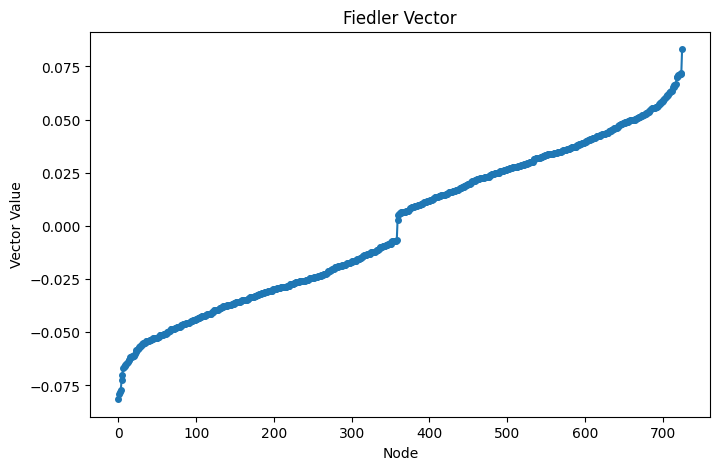

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(sorted(fiedler_vector), marker='o', linestyle='-', markersize=4)
plt.title("Fiedler Vector")
plt.xlabel("Node")
plt.ylabel("Vector Value")
plt.show()

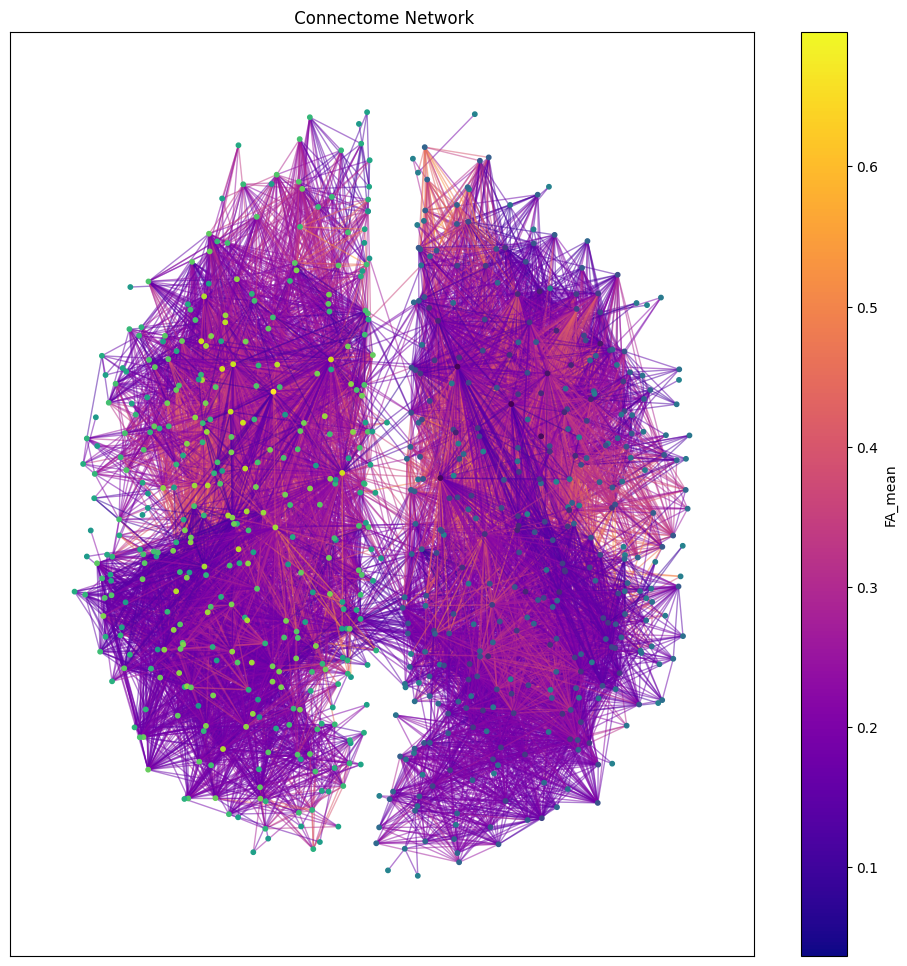

In [19]:
connectome.plot_net(use_3d=False, color_eig=[node_importance[node] for node in graph.nodes])

In [20]:
true_labels = {node: graph.nodes[node]["dn_hemisphere"] for node in graph.nodes}

predicted_labels = {node: "left" if node_importance[node] < 0 else "right" for node in graph.nodes}

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert dictionaries to lists for evaluation
y_true = [true_labels[node] for node in graph.nodes]
y_pred = [predicted_labels[node] for node in graph.nodes]

# Print metrics
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[359   1]
 [  0 366]]
              precision    recall  f1-score   support

        left       1.00      1.00      1.00       360
       right       1.00      1.00      1.00       366

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726



In [2]:
import os
from Connectome import *
import numpy as np
import networkx as nx
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def get_idx(eigenvalues):
    diff = 1e-4
    for i in range(len(eigenvalues) - 1):
        curr = eigenvalues[i]
        ne = eigenvalues[i+1]
        if np.abs(curr - ne) > diff and ne > 1e-6:
            return i+1, i+2
    return None

folder_path = 'data/repeated_10_scale_500/'

total_correct = 0
total_predictions = 0

for filename in os.listdir(folder_path):
    if filename.endswith('.graphml'):
        connectome = Connectome(os.path.join(folder_path, filename), label='')
        connectome.read_net(use_3d=False)
        graph = connectome.graph
        
        A = nx.adjacency_matrix(graph)
        L = laplacian(A, normed=True)
        
        eigenvalues, eigenvectors = eigsh(L, k=10, which='SM')
        
        yi, yj = get_idx(eigenvalues)
        fiedler_vector = eigenvectors[:, np.argsort(eigenvalues)[yi]]  # Second smallest eigenvector
        
        node_importance = {node: fiedler_vector[i] for i, node in enumerate(graph.nodes)}
        
        true_labels = {node: graph.nodes[node]["dn_hemisphere"] for node in graph.nodes}
        
        predicted_labels = {node: "right" if node_importance[node] < 0 else "left" for node in graph.nodes}
        
        sample_nodes = list(graph.nodes)[:5]  # You can select more nodes or specific nodes to check
        initial_sign = [node_importance[node] for node in sample_nodes]
        
        if np.mean(initial_sign) > 0:
            predicted_labels = {node: "left" if node_importance[node] < 0 else "right" for node in graph.nodes}
        
        y_true = [true_labels[node] for node in graph.nodes]
        y_pred = [predicted_labels[node] for node in graph.nodes]
        
        correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
        total_correct += correct_predictions
        total_predictions += len(y_true)

overall_accuracy = total_correct / total_predictions
print(f"Overall accuracy across all files: {overall_accuracy:.4f}")

Overall accuracy across all files: 0.9966
